<a href="https://colab.research.google.com/github/vaishakmk/TedTalk-Analysis/blob/main/dheeraj_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd


import os
import io
import codecs
import joblib
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import tensorflow as tf

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#Load dataframe

In [2]:
speaker=pd.read_csv('/content/drive/MyDrive/ted_talk_dataset/speaker_data.csv')
talk=pd.read_csv('/content/drive/MyDrive/ted_talk_dataset/talk_data.csv')
transcript=pd.read_csv('/content/drive/MyDrive/ted_talk_dataset/transcript_data.csv')


#Speaker

In [3]:
speaker.head()

,talk,speaker,speaker_title,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,NaN,NaN,NaN
1,The exploitation of US college athletes,Tim Nevius,NaN,College sports lawyer,Tim Nevius is a leading sports lawyer and college athlete advocate.
2,How does ultrasound work?,Jacques Abramowicz,NaN,NaN,NaN
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,NaN,Sex historian,Kate Lister is a sex historian and lecturers at Leeds Trinity University.
4,The electrical blueprints that orchestrate life,Michael Levin,NaN,Bioelectric explorer,"Michael Levin's research could give rise to adaptive, self-repairing robotics and novel platforms for artificial intelligence."


In [4]:
speaker.isnull().sum()

talk              141
speaker           145
speaker_title    4433
speaker_occ       789
speaker_bio       764
dtype: int64

In [5]:
#remove rows with no talk 
speaker=speaker.dropna(subset=['talk'])

In [6]:
speaker.isnull().sum()

talk                0
speaker             4
speaker_title    4292
speaker_occ       648
speaker_bio       623
dtype: int64

In [7]:
speaker=speaker.drop(columns=['speaker_title'])

In [8]:
#fill the null values for speaker occ with "unknown"
speaker['speaker_occ'] = speaker['speaker_occ'].fillna('Unknown')

In [9]:
#fill the null values for speaker bio with "unknown"
speaker['speaker_bio'] = speaker['speaker_bio'].fillna('Unknown')

In [10]:
speaker.isnull().sum()

talk           0
speaker        4
speaker_occ    0
speaker_bio    0
dtype: int64

In [11]:
#fill the null values for speaker with "unknown"
speaker['speaker'] = speaker['speaker'].fillna('Unknown')

In [12]:
speaker.isnull().sum()

talk           0
speaker        0
speaker_occ    0
speaker_bio    0
dtype: int64

In [13]:
speaker.head()

,talk,speaker,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and college athlete advocate.
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers at Leeds Trinity University.
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,"Michael Levin's research could give rise to adaptive, self-repairing robotics and novel platforms for artificial intelligence."


#Talk

In [14]:
talk.head()

,talk_desc,event,talk_name,views,duration,tags,recorded_at,published on
0,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,"['education', 'psychology', 'animation', 'TED-Ed', 'brain', 'climate change']",2021-04-05T00:00:00.000+00:00,1617636753
1,"Colleges and universities in the US make billions of dollars each year from sports, compromising the health and education of athletes -- who are disproportionately Black -- in the name of money, p...",TEDxDayton,The exploitation of US college athletes,438573,611,"['sports', 'law', 'education', 'United States', 'race', 'policy', 'TEDx']",2020-11-10T00:00:00.000+00:00,1617634131
2,"In a dark cave, bats can't see much. But even with their eyes shut, they can navigate rocky topography at incredible speeds. This is because bats aren't just guided by their eyes, but rather, by t...",TED-Ed,How does ultrasound work?,140874,295,"['education', 'technology', 'animation', 'TED-Ed', 'invention', 'medicine', 'health care', 'medical imaging', 'science', 'pregnancy', 'innovation', 'health', 'biology', 'healthcare', 'sound']",2021-04-01T00:00:00.000+00:00,1617290223
3,"With candor and cunning, sex historian Kate Lister chronicles the curious journey of an ancient, honest word with innocent origins and a now-scandalous connotation in this uproarious love letter t...",TEDxUniversityofGlasgow,"An honest history of an ancient and ""nasty"" word",569477,1148,"['sex', 'language', 'ancient world', 'history', 'society', 'TEDx', 'humor']",2020-03-06T00:00:00.000+00:00,1617289565
4,"DNA isn't the only builder in the biological world -- there's also a mysterious bioelectric layer directing cells to work together to grow organs, systems and bodies, says biologist Michael Levin....",TED2020,The electrical blueprints that orchestrate life,122682,1176,"['biology', 'science', 'invention', 'robots', 'DNA', 'technology', 'nature', 'innovation', 'future', 'engineering']",2020-05-18T00:00:00.000+00:00,1617213773


In [15]:
#no null values
talk.isnull().sum()

talk_desc       0
event           0
talk_name       0
views           0
duration        0
tags            0
recorded_at     0
published on    0
dtype: int64

#Transcript

In [16]:
transcript.head()

,title,transcript
0,Can you outsmart the apples and oranges fallacy?,"Baking apple pie? Discount orange warehouse has you covered! A fruit’s a fruit, right?It’s 1988, and scientist James Hansen has just testified to the United States Congress that global warming t..."
1,The exploitation of US college athletes,"In college sports, American universities are exploiting, disproportionately, Black athletes for billions of dollars, while diminishing their education, health and safety. Let me start with a bit o..."
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. But even with their eyes shut, they can navigate rocky topography at incredible speeds. This is because a bat’s flight isn’t just guided by its eyes, b..."
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go, you are now entering a hard-hat area. We're going to be unabashed in this, I am talking to you about a very particular word, a very powerful word, a..."
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to see you. I'm excited for this conversation.Michael Levin: Thank you so much. I'm so happy to be here.CA: So, most of us have this mental model in biolog..."


In [17]:
transcript.isnull().sum()

title           0
transcript    144
dtype: int64

In [18]:
transcript = transcript.dropna(subset=['transcript'])

#Merging

In [19]:
df = pd.merge(speaker, talk, how='inner', left_on = 'talk', right_on = 'talk_name')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4418 non-null   object
 1   speaker       4418 non-null   object
 2   speaker_occ   4418 non-null   object
 3   speaker_bio   4418 non-null   object
 4   talk_desc     4418 non-null   object
 5   event         4418 non-null   object
 6   talk_name     4418 non-null   object
 7   views         4418 non-null   int64 
 8   duration      4418 non-null   int64 
 9   tags          4418 non-null   object
 10  recorded_at   4418 non-null   object
 11  published on  4418 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 448.7+ KB


In [21]:
df = df.drop(columns=['talk_name'])

In [22]:
df = pd.merge(df, transcript, how='inner', left_on = 'talk', right_on = 'title')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 7166
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          7167 non-null   object
 1   speaker       7167 non-null   object
 2   speaker_occ   7167 non-null   object
 3   speaker_bio   7167 non-null   object
 4   talk_desc     7167 non-null   object
 5   event         7167 non-null   object
 6   views         7167 non-null   int64 
 7   duration      7167 non-null   int64 
 8   tags          7167 non-null   object
 9   recorded_at   7167 non-null   object
 10  published on  7167 non-null   int64 
 11  title         7167 non-null   object
 12  transcript    7167 non-null   object
dtypes: int64(3), object(10)
memory usage: 783.9+ KB


In [24]:
df = df.drop(columns=['title'])

In [25]:
df = df.drop_duplicates(subset=['talk'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016 entries, 0 to 7166
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4016 non-null   object
 1   speaker       4016 non-null   object
 2   speaker_occ   4016 non-null   object
 3   speaker_bio   4016 non-null   object
 4   talk_desc     4016 non-null   object
 5   event         4016 non-null   object
 6   views         4016 non-null   int64 
 7   duration      4016 non-null   int64 
 8   tags          4016 non-null   object
 9   recorded_at   4016 non-null   object
 10  published on  4016 non-null   int64 
 11  transcript    4016 non-null   object
dtypes: int64(3), object(9)
memory usage: 407.9+ KB


In [27]:
df.to_csv('/content/drive/MyDrive/ted_talk_dataset/dheeraj_data.csv',index=False)

#Analysis

In [28]:
df1 = pd.read_csv('/content/drive/MyDrive/ted_talk_dataset/dheeraj_data.csv')

In [29]:
df1['transcript']

0       Baking apple pie? Discount orange warehouse has you covered! A fruit’s a fruit, right?It’s 1988, and scientist James Hansen  has just testified to the United States Congress  that global warming t...
1       In college sports, American universities are exploiting, disproportionately, Black athletes for billions of dollars, while diminishing their education, health and safety. Let me start with a bit o...
2       In a pitch-black cave, bats can’t see much. But even with their eyes shut, they can navigate rocky topography  at incredible speeds. This is because a bat’s flight isn’t just guided by its eyes, b...
3       First, a warning. As far as offensive words go, you are now entering a hard-hat area. We're going to be unabashed in this, I am talking to you about a very particular word, a very powerful word, a...
4       Chris Anderson: Mike, welcome. It's good to see you. I'm excited for this conversation.Michael Levin: Thank you so much. I'm so happy to be here.CA: So, most of

In [30]:
#Number of characters 
def count_chars(text):
    return len(text)
    print(text)

df1['char_count'] = df1["transcript"].apply(lambda x:count_chars(x))

In [31]:
df1['char_count']

0        4061
1        9091
2        4068
3       17155
4       19537
        ...  
4011    17403
4012    17454
4013    18249
4014    18317
4015    11814
Name: char_count, Length: 4016, dtype: int64

In [32]:
#Number of words
def count_words(text):
    return len(text.split())

df1['word_count'] = df1["transcript"].apply(lambda x:count_words(x))
df1['word_count']

0        645
1       1444
2        654
3       3033
4       3451
        ... 
4011    3127
4012    3066
4013    3015
4014    3253
4015    2089
Name: word_count, Length: 4016, dtype: int64

In [33]:
#Number of words in quotes
def count_words_in_quotes(text):
    x = re.findall("'.'|\".\"", text)
    count=0
    if x is None:
        return 0
    else:
        for i in x:
            t=i[1:-1]
            count+=count_words(t)
        return count

df1['quoted_word_count'] = df1["transcript"].apply(lambda x:count_words_in_quotes(x))

In [34]:
df1['quoted_word_count']

0       0
1       0
2       0
3       0
4       0
       ..
4011    0
4012    0
4013    0
4014    1
4015    0
Name: quoted_word_count, Length: 4016, dtype: int64

In [35]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
#Number of sentences
def count_sent(text):
    return len(nltk.sent_tokenize(text))

df1['sent_count'] = df1["transcript"].apply(lambda x:count_sent(x))

In [37]:
df1['sent_count']

0        30
1        49
2        31
3       185
4       148
       ... 
4011    227
4012    255
4013    167
4014    273
4015    134
Name: sent_count, Length: 4016, dtype: int64

In [38]:
#Count the number of unique words
def count_unique_words(text):
    return len(set(text.split()))

df1['unique_word_count'] = df1["transcript"].apply(lambda x:count_unique_words(x))
df1['unique_word_count']

0        374
1        697
2        399
3       1272
4       1034
        ... 
4011     989
4012    1153
4013    1330
4014    1291
4015     875
Name: unique_word_count, Length: 4016, dtype: int64

In [39]:
#Count of stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

df1['stopword_count'] = df1["transcript"].apply(lambda x:count_stopwords(x))
df1['stopword_count']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        296
1        591
2        231
3       1396
4       1731
        ... 
4011    1470
4012    1480
4013    1271
4014    1398
4015     986
Name: stopword_count, Length: 4016, dtype: int64

In [40]:
#Calculating average word length
df1['avg_wordlength'] = df1['char_count']/df1['word_count']
df1['avg_wordlength']

0       6.296124
1       6.295706
2       6.220183
3       5.656116
4       5.661258
          ...   
4011    5.565398
4012    5.692759
4013    6.052736
4014    5.630802
4015    5.655337
Name: avg_wordlength, Length: 4016, dtype: float64

In [41]:
#Calculating average sentence length
df1['avg_sentlength'] = df1['word_count']/df1['sent_count']
df1['avg_sentlength']

0       21.500000
1       29.469388
2       21.096774
3       16.394595
4       23.317568
          ...    
4011    13.775330
4012    12.023529
4013    18.053892
4014    11.915751
4015    15.589552
Name: avg_sentlength, Length: 4016, dtype: float64

In [42]:
feature_set = df1.copy(deep=True)

In [43]:
df2 = df1.copy(deep=True) 

In [44]:
feature_set.columns

Index(['talk', 'speaker', 'speaker_occ', 'speaker_bio', 'talk_desc', 'event',
       'views', 'duration', 'tags', 'recorded_at', 'published on',
       'transcript', 'char_count', 'word_count', 'quoted_word_count',
       'sent_count', 'unique_word_count', 'stopword_count', 'avg_wordlength',
       'avg_sentlength'],
      dtype='object')

In [45]:
feature_set.drop(['talk', 'speaker', 'speaker_occ', 'speaker_bio', 'talk_desc', 'event',
       'views', 'duration', 'tags', 'recorded_at', 'published on',
       'transcript'],axis=1,inplace=True)


In [46]:
feature_set.columns

Index(['char_count', 'word_count', 'quoted_word_count', 'sent_count',
       'unique_word_count', 'stopword_count', 'avg_wordlength',
       'avg_sentlength'],
      dtype='object')

In [47]:
df1.drop(['char_count', 'word_count', 'quoted_word_count',
       'sent_count', 'unique_word_count', 'stopword_count', 'avg_wordlength',
       'avg_sentlength'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016 entries, 0 to 7166
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4016 non-null   object
 1   speaker       4016 non-null   object
 2   speaker_occ   4016 non-null   object
 3   speaker_bio   4016 non-null   object
 4   talk_desc     4016 non-null   object
 5   event         4016 non-null   object
 6   views         4016 non-null   int64 
 7   duration      4016 non-null   int64 
 8   tags          4016 non-null   object
 9   recorded_at   4016 non-null   object
 10  published on  4016 non-null   int64 
 11  transcript    4016 non-null   object
dtypes: int64(3), object(9)
memory usage: 407.9+ KB


In [48]:
feature_set.columns

Index(['char_count', 'word_count', 'quoted_word_count', 'sent_count',
       'unique_word_count', 'stopword_count', 'avg_wordlength',
       'avg_sentlength'],
      dtype='object')

In [49]:
df1.columns

Index(['talk', 'speaker', 'speaker_occ', 'speaker_bio', 'talk_desc', 'event',
       'views', 'duration', 'tags', 'recorded_at', 'published on',
       'transcript'],
      dtype='object')

In [50]:
df2 = df1.copy(deep=True) 

In [51]:
df2.columns

Index(['talk', 'speaker', 'speaker_occ', 'speaker_bio', 'talk_desc', 'event',
       'views', 'duration', 'tags', 'recorded_at', 'published on',
       'transcript', 'char_count', 'word_count', 'quoted_word_count',
       'sent_count', 'unique_word_count', 'stopword_count', 'avg_wordlength',
       'avg_sentlength'],
      dtype='object')

# Visualization

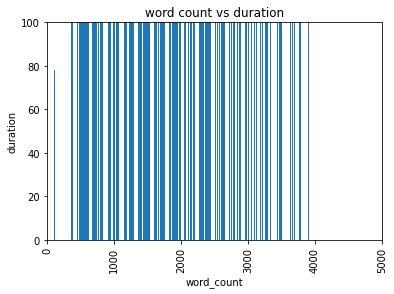

In [52]:
plt.bar(df2['word_count'], df2['duration'])
plt.title('word count vs duration')
plt.xlabel('word_count')
plt.ylabel('duration')
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.xlim(0,5000)
plt.show()

In [53]:
df2.avg_sentlength.describe()

count    4016.000000
mean       19.741028
std         8.872741
min         1.000000
25%        16.110133
50%        18.933315
75%        22.045996
max       293.500000
Name: avg_sentlength, dtype: float64

In [54]:

#Finding the text length distribution
df2['sent_len'] = df2['transcript'].apply(lambda x: len(x.split(" ")))
max_seq_len = np.round(df2['sent_len'].mean() + 2 * df2['sent_len'].std()).astype(int)
max_seq_len

3780

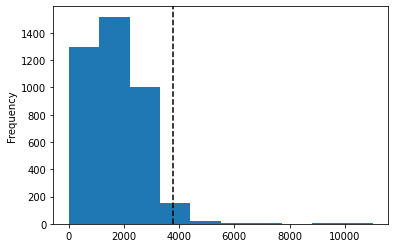

In [55]:
df2['sent_len'].plot.hist()
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len');

In [56]:
from wordcloud import WordCloud

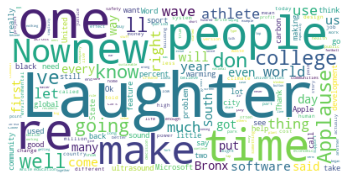

In [57]:
text = df2['transcript'].values 

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [58]:
df2.views.describe()

count    4.016000e+03
mean     2.252319e+06
std      3.736987e+06
min      0.000000e+00
25%      8.809808e+05
50%      1.437408e+06
75%      2.268556e+06
max      7.017697e+07
Name: views, dtype: float64

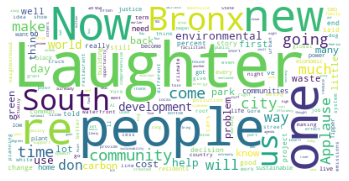

In [59]:
filter = df2["views"]>2.252319e+06 #greater than mean
text1 = df2['transcript'].where(filter).values

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(text1))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

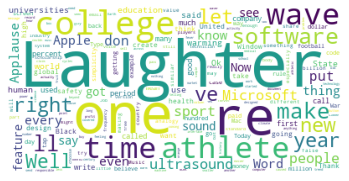

In [60]:
filter = df2["views"]<2.252319e+06 #less than mean
text2 = df2['transcript'].where(filter).values

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
trans_df = df2.transcript

In [62]:
trans_df.head()

0    Baking apple pie? Discount orange warehouse has you covered! A fruit’s a fruit, right?It’s 1988, and scientist James Hansen  has just testified to the United States Congress  that global warming t...
1    In college sports, American universities are exploiting, disproportionately, Black athletes for billions of dollars, while diminishing their education, health and safety. Let me start with a bit o...
2    In a pitch-black cave, bats can’t see much. But even with their eyes shut, they can navigate rocky topography  at incredible speeds. This is because a bat’s flight isn’t just guided by its eyes, b...
3    First, a warning. As far as offensive words go, you are now entering a hard-hat area. We're going to be unabashed in this, I am talking to you about a very particular word, a very powerful word, a...
4    Chris Anderson: Mike, welcome. It's good to see you. I'm excited for this conversation.Michael Levin: Thank you so much. I'm so happy to be here.CA: So, most of us have this m

In [63]:
#finding most commonly occuring words
from nltk.corpus import stopwords



stop_words = stopwords.words('english')

trans_df = trans_df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#trans_df= trans_df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [64]:
trans_df

0       Baking apple pie? Discount orange warehouse covered! A fruit’s fruit, right?It’s 1988, scientist James Hansen testified United States Congress global warming trends caused human activity, pose inc...
1       In college sports, American universities exploiting, disproportionately, Black athletes billions dollars, diminishing education, health safety. Let start bit history. In November 1984, undersized ...
2       In pitch-black cave, bats can’t see much. But even eyes shut, navigate rocky topography incredible speeds. This bat’s flight isn’t guided eyes, rather, ears. It may seem impossible see sound, bats...
3       First, warning. As far offensive words go, entering hard-hat area. We're going unabashed this, I talking particular word, powerful word, "see next Tuesday" word. A word still offensive funders eve...
4       Chris Anderson: Mike, welcome. It's good see you. I'm excited conversation.Michael Levin: Thank much. I'm happy here.CA: So, us mental model biology DNA propert

In [65]:
words = []
words = [word for i in trans_df for word in i.split()]

In [66]:
from collections import Counter
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq["bool_series"]= freq["word"].str.isalpha()
freq.drop(freq[freq['bool_series'] == False].index, inplace = True)
freq.drop('bool_series', 1)
freq.head(10)

,word,frequency,bool_series
0,I,99098,True
1,And,53683,True
3,like,22244,True
4,people,21340,True
5,one,20850,True
6,So,19315,True
7,But,17405,True
8,The,16283,True
9,would,15464,True
10,going,15406,True


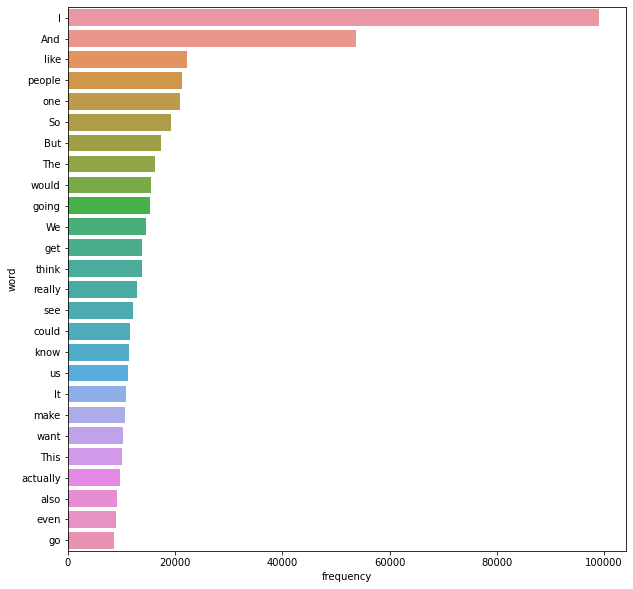

In [67]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

From the above plot we can see that most speaker have a habit of repeatedly using words such as "I" ,"And" and "Like"

In [68]:
#No of talks in each ted event
events_df = df2[['talk', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
54,TED-Ed,635
77,TED2018,90
78,TED2019,85
76,TED2017,84
72,TED2013,74
73,TED2014,73
68,TED2009,72
75,TED2016,69
74,TED2015,68
69,TED2010,65


In [69]:
import ast
df2['tags'] = df2['tags'].apply(lambda x: ast.literal_eval(x))

In [70]:
s = df2.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [71]:
theme_df = df2.drop('tags', axis=1).join(s)
theme_df.head()

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,recorded_at,published on,...,char_count,word_count,quoted_word_count,sent_count,unique_word_count,stopword_count,avg_wordlength,avg_sentlength,sent_len,theme
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,...,4061,645,0,30,374,296,6.296124,21.5,677,education
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,...,4061,645,0,30,374,296,6.296124,21.5,677,psychology
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,...,4061,645,0,30,374,296,6.296124,21.5,677,animation
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,...,4061,645,0,30,374,296,6.296124,21.5,677,TED-Ed
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,...,4061,645,0,30,374,296,6.296124,21.5,677,brain


In [72]:
len(theme_df['theme'].value_counts())

459

In [73]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,science,972
1,technology,950
2,TED-Ed,646
3,culture,644
4,TEDx,577
5,animation,577
6,society,536
7,global issues,532
8,social change,510
9,education,494


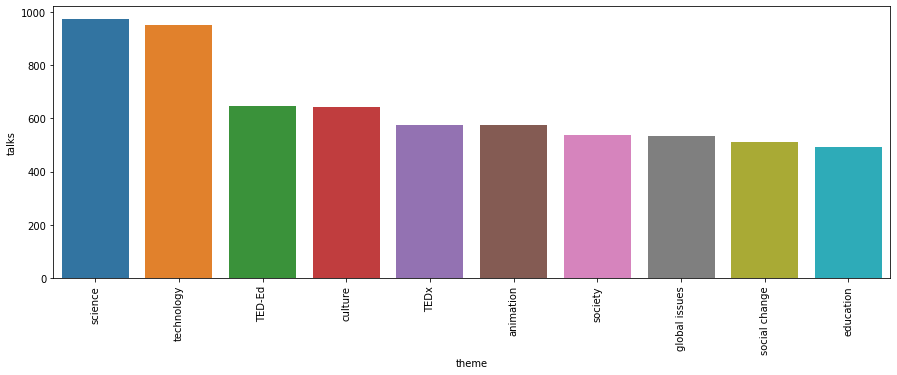

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.xticks(rotation=90)
plt.show()

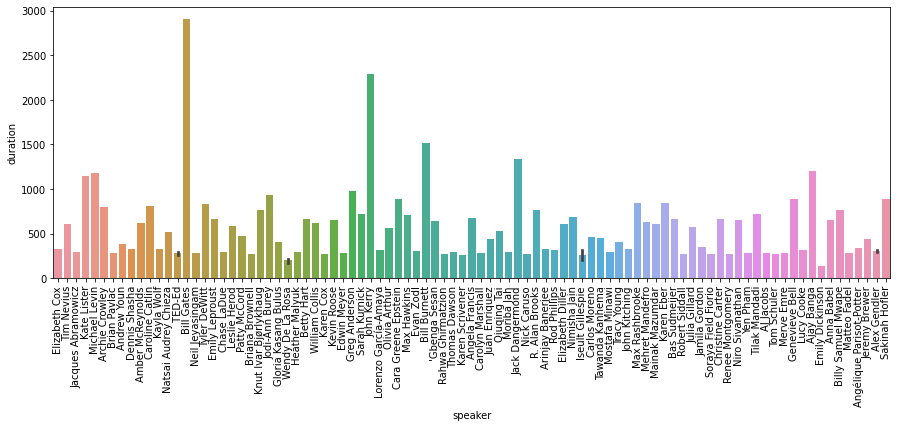

In [75]:
#Speaker vs duration
plt.figure(figsize=(15,5))
sns.barplot(x='speaker', y='duration', data=df2.head(100))
plt.xticks(rotation=90)
plt.show()

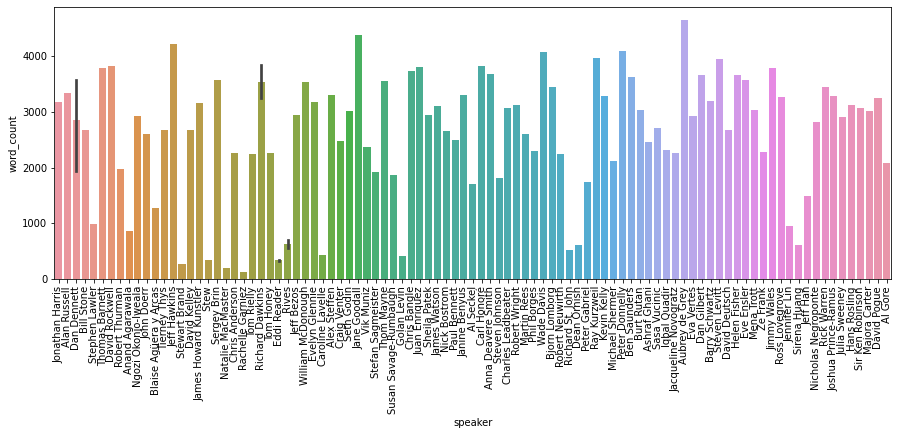

In [76]:
#Speaker vs word count
plt.figure(figsize=(15,5))
sns.barplot(x='speaker', y='word_count', data=df2.tail(100))
plt.xticks(rotation=90)
plt.show()

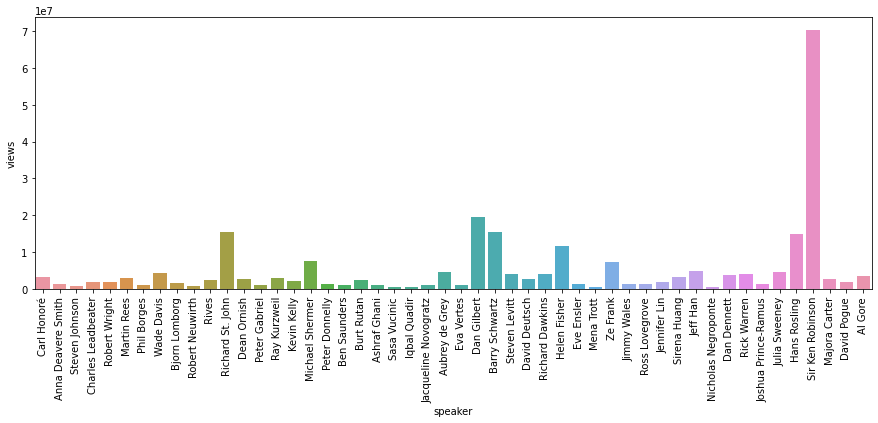

In [77]:
#Speaker vs views
plt.figure(figsize=(15,5))
sns.barplot(x='speaker', y='views', data=df2.tail(50))
plt.xticks(rotation=90)
plt.show()

In [78]:
#Talk Duration and Word Counts
df2['duration'] = df2['duration']/60
df2['duration'].describe()

count    4016.000000
mean       11.824153
std         6.299392
min         1.000000
25%         6.083333
50%        11.908333
75%        15.950000
max        66.516667
Name: duration, dtype: float64

In [79]:
#shortest talk

df2[df2['duration']==1.0].speaker 

663    Clint Smith
Name: speaker, dtype: object

In [80]:
df2[df2['duration']==1.0].talk

663    "Ode to the Only Black Kid in the Class"
Name: talk, dtype: object

In [81]:
#longest talk
df2[df2['duration']==66.51666666666667].speaker

326    Dr. Phillip Atiba Goff
Name: speaker, dtype: object

In [82]:
 df2[df2['duration']==66.51666666666667].talk

326    The path to ending systemic racism in the US
Name: talk, dtype: object

In [83]:
df2.speaker.value_counts()

Alex Gendler        35
Iseult Gillespie    27
Daniel Finkel       12
Elizabeth Cox       11
Juan Enriquez       10
                    ..
Leila Takayama       1
David Katz           1
George Steinmetz     1
Wendy Woods          1
Rick Warren          1
Name: speaker, Length: 3292, dtype: int64

In [84]:
pop_speaker = df2[['speaker']].copy(deep=True)

In [85]:
pop_speaker.head()

,speaker
0,Elizabeth Cox
1,Tim Nevius
2,Jacques Abramowicz
3,Kate Lister
4,Michael Levin


In [86]:
pop_speaker.speaker.value_counts(sort=False)

Elizabeth Cox         11
Tim Nevius             1
Jacques Abramowicz     1
Kate Lister            1
Michael Levin          1
                      ..
Ross Lovegrove         1
Jennifer Lin           1
Sirena Huang           1
Jeff Han               1
Rick Warren            1
Name: speaker, Length: 3292, dtype: int64

In [87]:
pop_speaker['Views'] = df2[['views']].copy(deep=True)

In [88]:
pop_speaker.head()

,speaker,Views
0,Elizabeth Cox,119359
1,Tim Nevius,438573
2,Jacques Abramowicz,140874
3,Kate Lister,569477
4,Michael Levin,122682


In [89]:
pop = pop_speaker.groupby(['speaker'],sort=False, as_index = False).sum()

In [90]:
pop.columns

Index(['speaker', 'Views'], dtype='object')

In [91]:
pop.head()

,speaker,Views
0,Elizabeth Cox,18698631
1,Tim Nevius,438573
2,Jacques Abramowicz,140874
3,Kate Lister,569477
4,Michael Levin,122682


In [92]:
pop_speaker.head()

,speaker,Views
0,Elizabeth Cox,119359
1,Tim Nevius,438573
2,Jacques Abramowicz,140874
3,Kate Lister,569477
4,Michael Levin,122682


In [93]:
test = pop_speaker.speaker.value_counts(sort=False).rename_axis('speaker').reset_index(name='count')

In [94]:
test.head()

,speaker,count
0,Elizabeth Cox,11
1,Tim Nevius,1
2,Jacques Abramowicz,1
3,Kate Lister,1
4,Michael Levin,1


In [95]:
test['count'].describe()

count    3292.000000
mean        1.219927
std         1.029019
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        35.000000
Name: count, dtype: float64

In [96]:
test['count']

0       11
1        1
2        1
3        1
4        1
        ..
3287     1
3288     1
3289     1
3290     1
3291     1
Name: count, Length: 3292, dtype: int64

In [97]:
pop.head()

,speaker,Views
0,Elizabeth Cox,18698631
1,Tim Nevius,438573
2,Jacques Abramowicz,140874
3,Kate Lister,569477
4,Michael Levin,122682


In [98]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  3292 non-null   object
 1   Views    3292 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.6+ KB


In [99]:
pop['count'] = test['count']

In [100]:
pop.head()

,speaker,Views,count
0,Elizabeth Cox,18698631,11
1,Tim Nevius,438573,1
2,Jacques Abramowicz,140874,1
3,Kate Lister,569477,1
4,Michael Levin,122682,1


In [101]:
pop['Avg_views'] = pop["Views"]/pop["count"]

In [102]:
pop.head()

,speaker,Views,count,Avg_views
0,Elizabeth Cox,18698631,11,1.699876e+06
1,Tim Nevius,438573,1,4.385730e+05
2,Jacques Abramowicz,140874,1,1.408740e+05
3,Kate Lister,569477,1,5.694770e+05
4,Michael Levin,122682,1,1.226820e+05


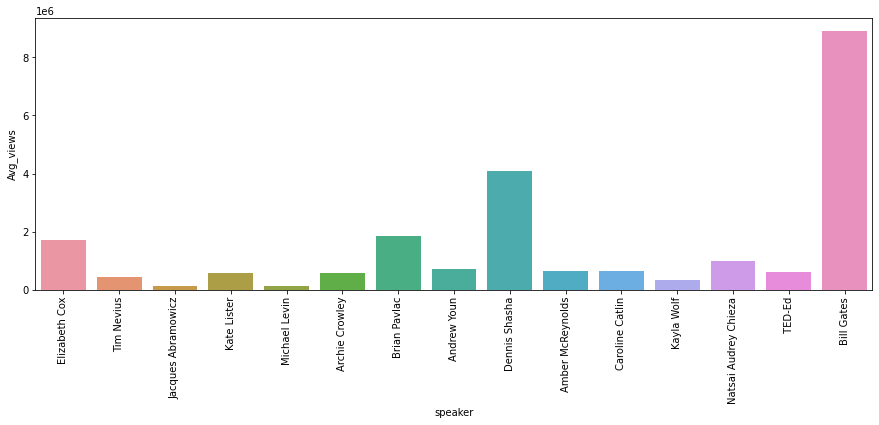

In [103]:
#Speaker vs Average Views
plt.figure(figsize=(15,5))
sns.barplot(x='speaker', y='Avg_views', data=pop.head(15))
plt.xticks(rotation=90)
plt.show()

In [104]:
pop2 = pop.sort_values('Avg_views',ascending=[False])

In [105]:
pop2.head()

,speaker,Views,count,Avg_views
2432,Amy Cuddy,61030600,1,61030600.0
1669,Tim Urban,49876247,1,49876247.0
1555,James Veitch,87908273,2,43954136.5
1129,Sam Berns,40315294,1,40315294.0
1716,Robert Waldinger,37902552,1,37902552.0


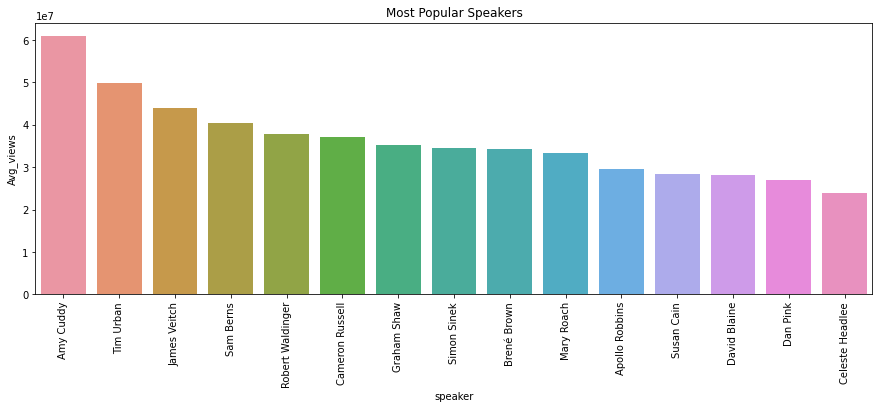

In [106]:
plt.figure(figsize=(15,5))
sns.barplot(x='speaker', y='Avg_views', data=pop2.head(15))
plt.title("Most Popular Speakers")
plt.xticks(rotation=90)
plt.show()

In [107]:
amy_text = df2.loc[df2['speaker'] == 'Amy Cuddy']

In [108]:
amy_text.head()

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,...,transcript,char_count,word_count,quoted_word_count,sent_count,unique_word_count,stopword_count,avg_wordlength,avg_sentlength,sent_len
2833,Your body language may shape who you are,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals that we can change other people’s perceptions — and perhaps even our own body chemistry — simply by changing body positions.,"(NOTE: Some of the findings presented in this talk have been referenced in an ongoing debate among social scientists about robustness and reproducibility. Read ""Criticisms & updates"" below for mor...",TEDGlobal 2012,61030600,21.033333,"[body language, brain, business, psychology, self, success, science]",2012-06-26T00:00:00.000+00:00,...,"So I want to start by offering you a free no-tech life hack, and all it requires of you is this: that you change your posture for two minutes. But before I give it away, I want to ask you to right...",20010,3602,0,245,1099,1757,5.555247,14.702041,3602


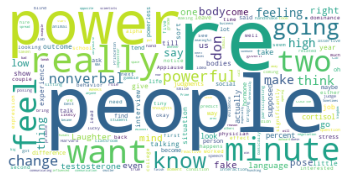

In [109]:
text = amy_text['transcript'].values

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [110]:
#correlation matrix
c_matrix= df2.corr()
c_matrix

,views,duration,published on,char_count,word_count,quoted_word_count,sent_count,unique_word_count,stopword_count,avg_wordlength,avg_sentlength,sent_len
views,1.000000,0.067248,-0.052668,0.067406,0.068560,0.024895,0.112246,0.070979,0.067563,-0.018036,-0.069052,0.067760
duration,0.067248,1.000000,-0.326460,0.940756,0.938691,0.032605,0.862398,0.923629,0.927065,-0.087239,-0.066381,0.937815
published on,-0.052668,-0.326460,1.000000,-0.330006,-0.347146,-0.023456,-0.401299,-0.328070,-0.349128,0.070769,0.087970,-0.344685
char_count,0.067406,0.940756,-0.330006,1.000000,0.997519,0.036704,0.896223,0.970592,0.989949,-0.127766,-0.049755,0.997394
word_count,0.068560,0.938691,-0.347146,0.997519,1.000000,0.039866,0.906356,0.965234,0.995105,-0.139841,-0.057437,0.999709
quoted_word_count,0.024895,0.032605,-0.023456,0.036704,0.039866,1.000000,0.064874,0.043538,0.036999,-0.013389,-0.026471,0.040250
sent_count,0.112246,0.862398,-0.401299,0.896223,0.906356,0.064874,1.000000,0.889398,0.887874,-0.149344,-0.244612,0.905574
unique_word_count,0.070979,0.923629,-0.328070,0.970592,0.965234,0.043538,0.889398,1.000000,0.946402,-0.143057,-0.074595,0.964690
stopword_count,0.067563,0.927065,-0.349128,0.989949,0.995105,0.036999,0.887874,0.946402,1.000000,-0.143684,-0.044841,0.994764
avg_wordlength,-0.018036,-0.087239,0.070769,-0.127766,-0.139841,-0.013389,-0.149344,-0.143057,-0.143684,1.000000,-0.042087,-0.138897
